In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset
customer_data = pd.read_csv("Customers.csv")
product_data = pd.read_csv("Products.csv")
transaction_data = pd.read_csv("Transactions.csv")

In [3]:
# Preview the data
print("\nCustomers:\n", customer_data.head())
print("\nProducts:\n", product_data.head())
print("\nTransactions:\n", transaction_data.head())


Customers:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  

In [4]:
# Display basic information about each dataset
print("Customers Dataset:\n", customer_data.info(), "\n")
print("Products Dataset:\n", product_data.info(), "\n")
print("Transactions Dataset:\n", transaction_data.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
Customers Dataset:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
Products Dataset:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  D

In [5]:
# Check for missing values
print("Missing valuse in Customers:\n", customer_data.isnull().sum(), "\n")
print("Missing valuse in Products:\n", product_data.isnull().sum(), "\n")
print("Missing valuse in Transactions:\n", transaction_data.isnull().sum(), "\n")

Missing valuse in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing valuse in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing valuse in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



##  EDA: Customers Dataset

In [7]:
#number of unique customers
print("Unique Customers:", customer_data['CustomerID'].nunique())

Unique Customers: 200


In [32]:
# Group by 'Region' and calculate the percentage contribution of each region
region_distribution = customer_data['Region'].value_counts(normalize=True) * 100

print("Regional Distribution (%):")
print(region_distribution)

Regional Distribution (%):
Region
South America    29.5
Europe           25.0
North America    23.0
Asia             22.5
Name: proportion, dtype: float64


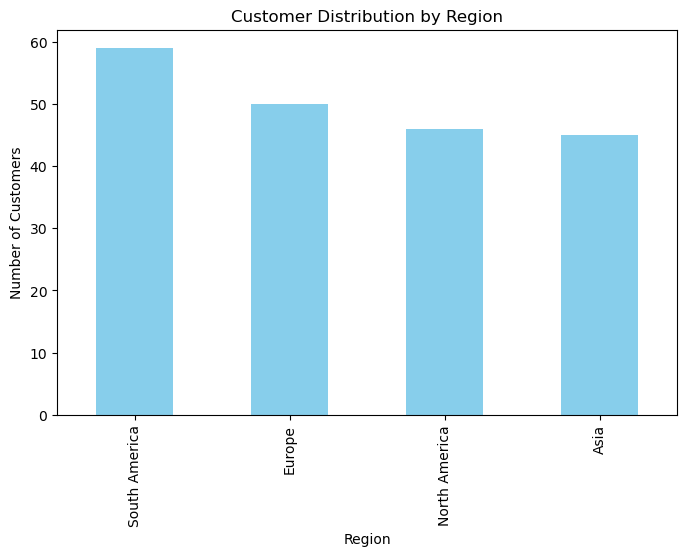

In [8]:
# Customer distribution by region
plt.figure(figsize=(8,5))
customer_data['Region'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

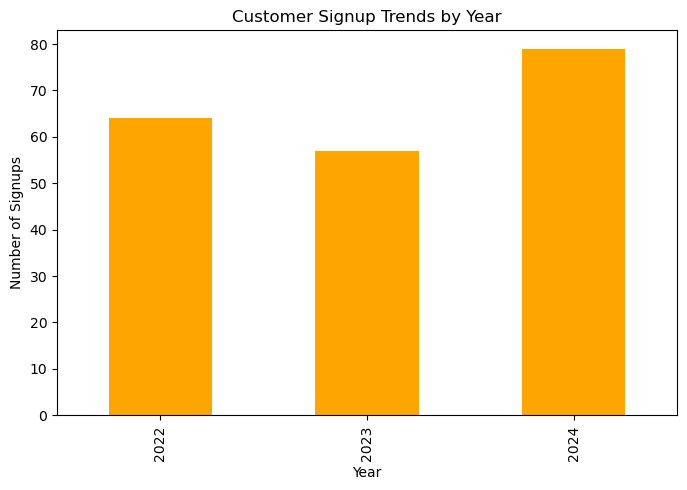

In [9]:
# Customer signup trends
customer_data['SignupDate'] = pd.to_datetime(customer_data['SignupDate'])
customer_data['SignupYear'] = customer_data['SignupDate'].dt.year
plt.figure(figsize=(8, 5))
customer_data['SignupYear'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Customer Signup Trends by Year")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

##  EDA: Products Dataset

In [11]:
# Number of unique products
print("Unique Products:", product_data['ProductID'].nunique())

Unique Products: 100


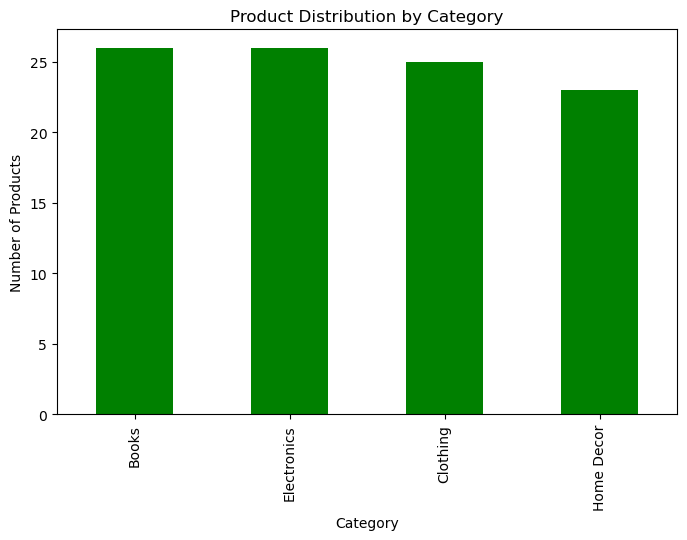

In [12]:
# Product distribution by Category
plt.figure(figsize=(8, 5))
product_data['Category'].value_counts().plot(kind='bar', color='green')
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

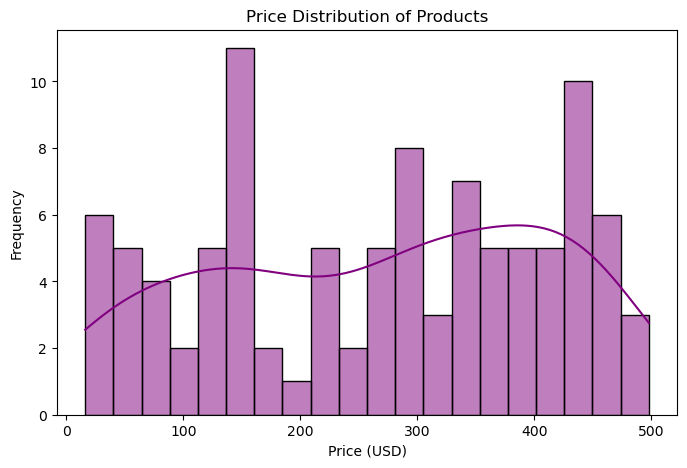

In [13]:
# Price distribution of products
plt.figure(figsize=(8, 5))
sns.histplot(product_data['Price'], bins=20, kde=True, color='purple')
plt.title("Price Distribution of Products")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

In [14]:
## EDA: Transactions Dataset 

In [15]:
# Number of unique transactions
print("Unique Transactions:", transaction_data['TransactionID'].nunique())

Unique Transactions: 1000


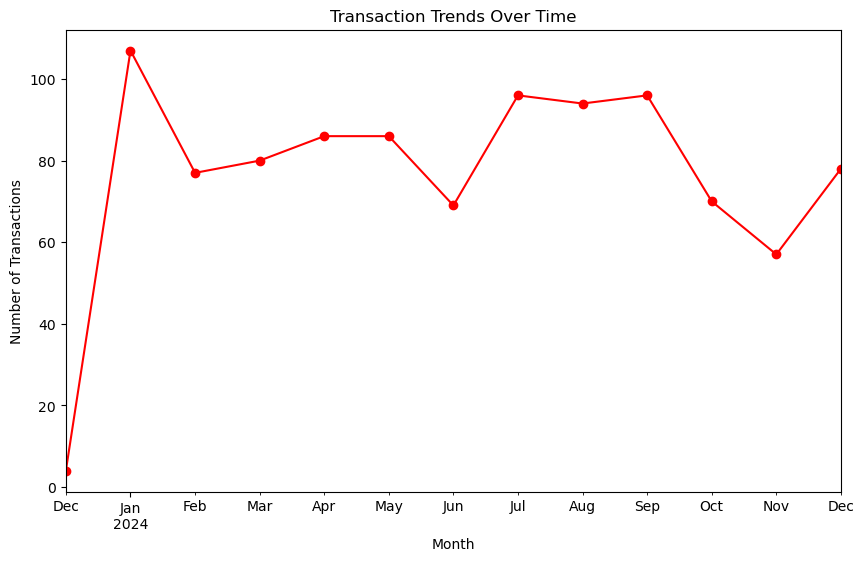

In [19]:
# Transaction trends over time
transaction_data['TransactionDate'] = pd.to_datetime(transaction_data['TransactionDate'])
transaction_data['TransactionMonth'] = transaction_data['TransactionDate'].dt.to_period('M')
plt.figure(figsize=(10, 6))
transaction_data['TransactionMonth'].value_counts().sort_index().plot(kind='line', marker='o', color='red')
plt.title("Transaction Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()

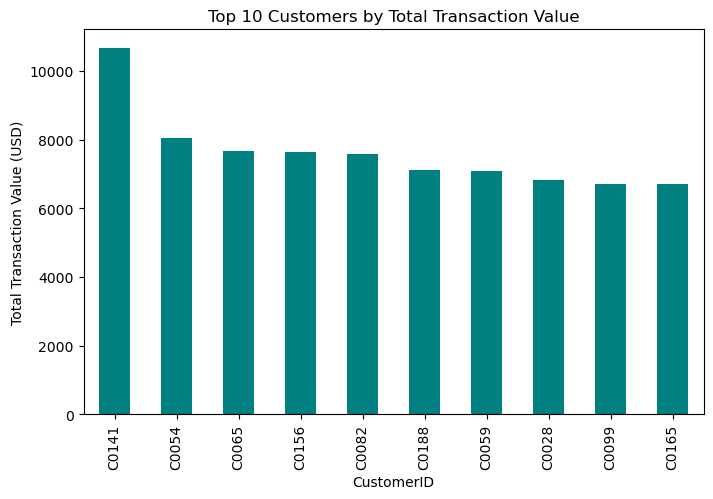

In [21]:
# Top 10 customers by total transaction value
top_customers = transaction_data.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
plt.figure(figsize=(8, 5))
top_customers.plot(kind='bar', color='teal')
plt.title("Top 10 Customers by Total Transaction Value")
plt.xlabel("CustomerID")
plt.ylabel("Total Transaction Value (USD)")
plt.show()

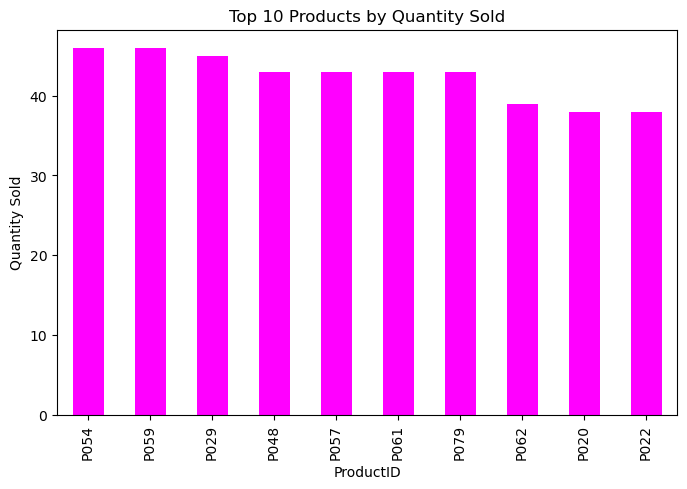

In [23]:
# Top 10 products by quantity sold
top_products = transaction_data.groupby('ProductID')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='magenta')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("ProductID")
plt.ylabel("Quantity Sold")
plt.show()

In [36]:
# Calculate the total sales value for each product
product_sales = transaction_data.groupby("ProductID")["TotalValue"].sum().reset_index()

# Calculate the overall sales across all products
total_sales = product_sales["TotalValue"].sum()

# Add a column for percentage contribution to total sales
product_sales["SalesPercentage"] = (product_sales["TotalValue"] / total_sales) * 100

# Identify underperforming products contributing less than 5% of total sales
underperforming_products = product_sales[product_sales["SalesPercentage"] < 5]

# Merge with Products dataset for better interpretability
underperforming_products = underperforming_products.merge(product_data, on="ProductID", how="left")

# Display underperforming products
print(underperforming_products)


   ProductID  TotalValue  SalesPercentage              ProductName  \
0       P001     3047.40         0.441655     ActiveWear Biography   
1       P002     8657.50         1.254718    ActiveWear Smartwatch   
2       P003     1367.72         0.198222  ComfortLiving Biography   
3       P004     1722.42         0.249628            BookWorld Rug   
4       P005    10303.44         1.493262          TechPro T-Shirt   
..       ...         ...              ...                      ...   
95      P096    10453.98         1.515079     SoundWave Headphones   
96      P097     7983.50         1.157036       BookWorld Cookbook   
97      P098     4798.88         0.695494         SoundWave Laptop   
98      P099     3897.19         0.564814   SoundWave Mystery Book   
99      P100     1895.10         0.274654        HomeSense Sweater   

       Category   Price  
0         Books  169.30  
1   Electronics  346.30  
2         Books   44.12  
3    Home Decor   95.69  
4      Clothing  429.31  
.. 

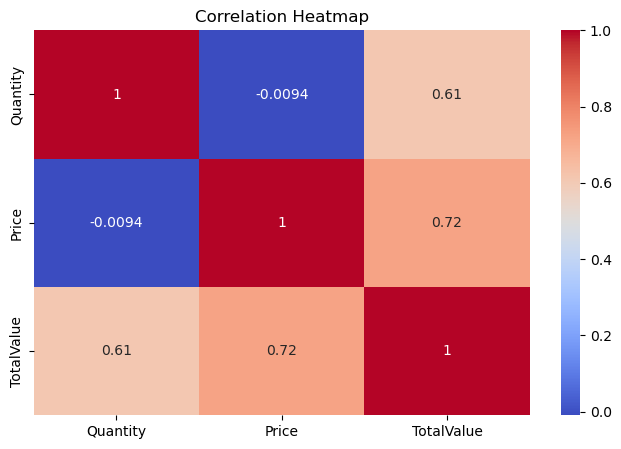

In [25]:
# Correlation between Quantity, Price, and TotalValue
plt.figure(figsize=(8, 5))
sns.heatmap(transaction_data[['Quantity', 'Price', 'TotalValue']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [27]:
# Save cleaned and processed data
customer_data.to_csv("Cleaned_Customers.csv", index=False)
product_data.to_csv("Cleaned_Products.csv", index=False)
transaction_data.to_csv("Cleaned_Transactions.csv", index=False)